<a href="https://colab.research.google.com/github/mobarakol/tutorial_notebooks/blob/main/Pdf_Figures_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Figure Example:

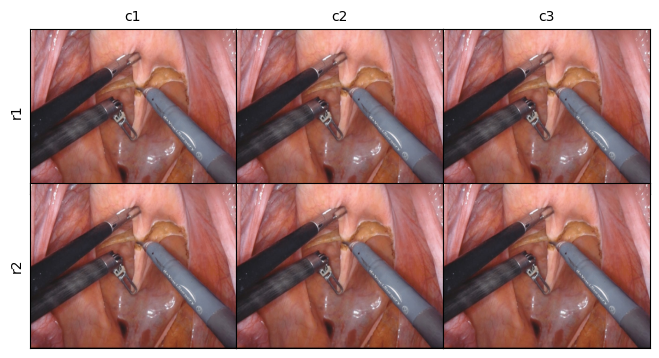

In [ ]:
from PIL import Image
import requests
import matplotlib.pyplot as plt
import numpy as np

image_url = "https://media.springernature.com/full/springer-static/image/art%3A10.1007%2Fs13304-020-00913-4/MediaObjects/13304_2020_913_Fig2_HTML.jpg"
img = Image.open(requests.get(image_url, stream=True).raw)
image = np.array(img)

fig2 = plt.figure(figsize=(8, 6))
ncols=3; nrows=2
row_title = ['r1', 'r2']
col_title = ['c1', 'c2', 'c3']
fontsize = 10
spec2 = gridspec.GridSpec(nrows=nrows, ncols=ncols, figure=fig2, wspace=0.0, hspace=-0.5)
for nr in range(nrows):
    for nc in range(ncols):
        ax = fig2.add_subplot(spec2[nr, nc])
        ax.imshow(image)
        ax.set_xticks([])
        ax.set_yticks([])
        if nr == 0:
            ax.set_title(col_title[nc], fontsize = fontsize)
        if nc == 0:
            ax.set_ylabel(row_title[nr], fontsize = fontsize)

fig2.savefig('perturbation_effect.pdf',bbox_inches='tight', dpi=100)

Figure Example-1:

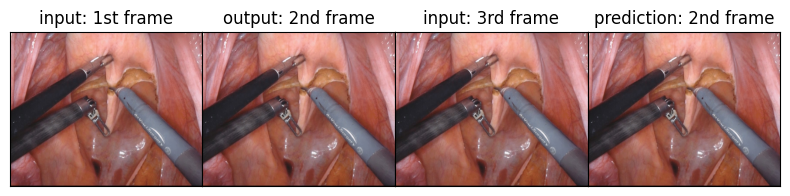

In [ ]:
plt.rcParams.update({'font.size': 10})
num_img = 4
fig, ax = plt.subplots(1, num_img, figsize=(2*num_img,10), subplot_kw=dict(xticks=[],yticks=[]))
ax[0].imshow(image)
ax[0].set_title('input: 1st frame')

ax[1].imshow(image)
ax[1].set_title('output: 2nd frame')

ax[2].imshow(image)
ax[2].set_title('input: 3rd frame');

ax[3].imshow(image)
ax[3].set_title('prediction: 2nd frame');
fig.tight_layout()
plt.subplots_adjust(wspace=0.0,hspace=0)
fig.savefig('perturbation_effect.pdf',bbox_inches='tight', dpi=100)

Figure Example:

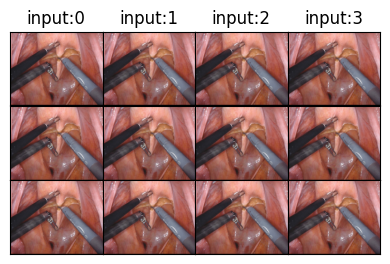

In [ ]:
plt.rcParams.update({'font.size': 10})
num_col = 4
num_row = 3
fig, ax = plt.subplots(num_row, num_col, figsize=(1*num_col,1*num_row), subplot_kw=dict(xticks=[],yticks=[]))
for r in range(num_row):
    for c in range(num_col):
        ax[r,c].imshow(image)
        if r == 0:
            ax[r,c].set_title('input:{}'.format(c))
fig.tight_layout()
plt.subplots_adjust(wspace=0.0, hspace=-0.3)
fig.savefig('perturbation_effect.pdf',bbox_inches='tight', dpi=100)

Figure with ImageData:

In [ ]:
import gdown
url = 'https://drive.google.com/uc?id=15k3At6E7qk_FrEDrEuhSBl2jmXP5RVvj'
gdown.download(url,'sample_0.jpg',quiet=True) 

'sample_0.jpg'

Example1:

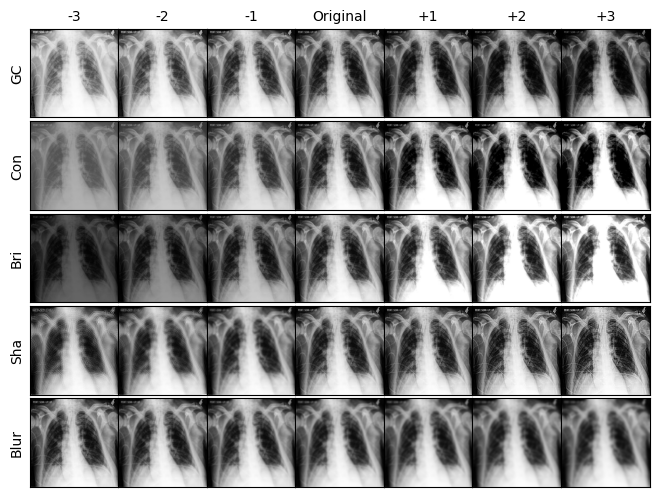

In [ ]:
from skimage import exposure
from skimage.filters import gaussian
from PIL import Image, ImageEnhance, ImageFilter
import cv2
import matplotlib.pyplot as plt
import numpy as np
import torchvision.transforms.functional as TF
import matplotlib.gridspec as gridspec

class perturbation_class:
    
    def gamma_correction(img):
        seq = []
        gammas = [0.4, 0.6, 0.8, 1, 1.2, 1.4, 1.6]#np.arange(1,0.1,-.03)
        img = Image.fromarray(img)
        for i in range(len(gammas)):
            z = TF.adjust_gamma(img, gammas[i], gain=1)
            seq.append(z)
        return seq
    
    def contrast(img):      
        seq = []
        factors = [0.4, 0.6, 0.8, 1, 1.2, 1.4, 1.6]
        img = Image.fromarray(img)
        for i in range(len(factors)):
            z = TF.adjust_contrast(img, factors[i])
            seq.append(z)
        return seq
    
    def brightness(img):
        seq = []
        factors = [0.4, 0.6, 0.8, 1, 1.2, 1.4, 1.6]
        img = Image.fromarray(img)
        for i in range(len(factors)):
            z = TF.adjust_brightness(img, factors[i])
            seq.append(z)
        return seq
    
    def sharpness(img):
        seq = []
        #factors = [0.4, 0.6, 0.8, 1, 1.2, 1.4, 1.6]
        factors = [ -6, -4, -2, 1, 2, 4, 6]
        img = Image.fromarray(img)
        for i in range(len(factors)):
            z = TF.adjust_sharpness(img, factors[i])
            seq.append(z)
        return seq
    
    def gaussian_blur(img):
        seq = []
        ksize = [1, 3, 5, 7, 9, 11, 13]
        img = Image.fromarray(img)
        for i in range(len(ksize)):       
            z = TF.gaussian_blur(img, kernel_size=ksize[i])
            seq.append(np.array(z))
        return seq

img_dir = 'sample_0.jpg'
original = cv2.imread(img_dir)
plt.rcParams.update({'font.size': 18})
ptech_list = [ '-3', '-2', '-1','Original', '+1', '+2', '+3']
ptech_listb = ['Original', '+1', '+2', '+3', '+4', '+5', '+6']
f_size = 25
perturbation_all = ['gamma_correction', 'contrast', 'brightness', 'sharpness','gaussian_blur']
filter_name = ['GC', 'Con', 'Bri', 'Sha', 'Blur']
fontsize = 10
fig2 = plt.figure(figsize=(8, 6))
ncols=7; nrows=5
spec2 = gridspec.GridSpec(nrows=nrows, ncols=ncols, figure=fig2, wspace=0.0, hspace=0.0)
for nr in range(nrows):
    class_method = getattr(perturbation_class, perturbation_all[nr])
    seq = class_method(original)
    for nc in range(ncols):
        ax = fig2.add_subplot(spec2[nr, nc])
        ax.imshow(seq[nc])
        ax.set_xticks([])
        ax.set_yticks([])
        if nr == 0:
            ax.set_title(ptech_list[nc], fontsize = fontsize)
        if nc == 0:
            ax.set_ylabel(filter_name[nr], fontsize = fontsize)

fig2.savefig('perturbation_effect.pdf',bbox_inches='tight', dpi=100)

Example2:

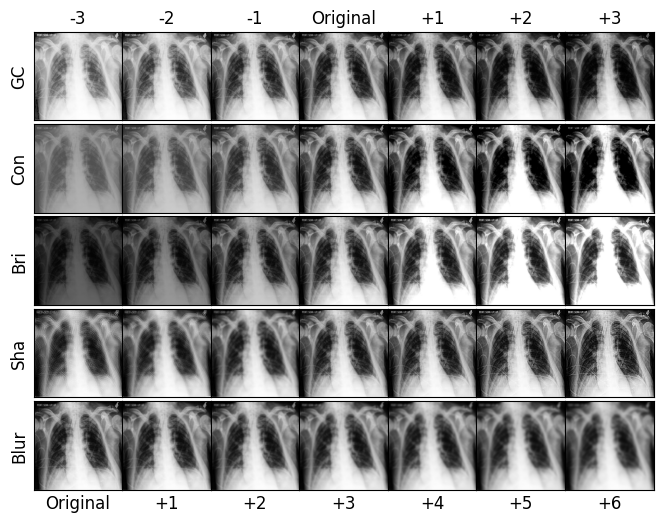

In [ ]:
img_dir = 'sample_0.jpg'
original = cv2.imread(img_dir)
plt.rcParams.update({'font.size': 18})
ptech_list = [ '-3', '-2', '-1','Original', '+1', '+2', '+3']
ptech_listb = ['Original', '+1', '+2', '+3', '+4', '+5', '+6']
f_size = 25
perturbation_all = ['gamma_correction', 'contrast', 'brightness', 'sharpness','gaussian_blur']
filter_name = ['GC', 'Con', 'Bri', 'Sha', 'Blur']
fontsize = 12
fig2 = plt.figure(figsize=(8, 6))
ncols=7; nrows=5
spec2 = gridspec.GridSpec(nrows=nrows, ncols=ncols, figure=fig2, wspace=0.0, hspace=0.0)
for nr in range(nrows):
    class_method = getattr(perturbation_class, perturbation_all[nr])
    seq = class_method(original)
    for nc in range(ncols):       
        if nr == 0:
            ax = fig2.add_subplot(spec2[nr, nc])
            ax.set_title(ptech_list[nc], fontsize = fontsize)
        elif nr == 4:
            ax = fig2.add_subplot(spec2[nr, nc])
            ax.set_title(ptech_listb[nc], y=-0.3, fontsize = fontsize)
        else:
            ax = fig2.add_subplot(spec2[nr, nc])
            
        if (nr != 4 and nc == 3) or (nr == 4 and nc == 0):
            ax.imshow(original)
        else:
            ax.imshow(seq[nc])
        ax.set_xticks([])
        ax.set_yticks([])
        if nc == 0:
            ax.set_ylabel(filter_name[nr], fontsize = fontsize)

fig2.savefig('perturbation_effect.pdf',bbox_inches='tight', dpi=100)

Comparison with EndoVis Challenge 2018 Participants<br>
Class-Wise Averaging:

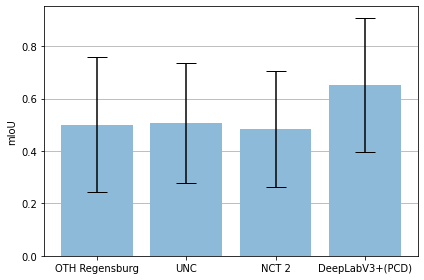

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# plt.rcParams.update({'lines.linewidth': 1})

OTH = [0.654, 0.282, 0.845, 0.658, 0.610, 0.478, 0.014, 0.282, 0.337, 0.849]
UNC = [0.614, 0.363, 0.839, 0.622, 0.542, 0.475, 0.000, 0.305, 0.545, 0.771]
NCT = [0.618, 0.293, 0.777, 0.622, 0.560, 0.330, 0.019, 0.335, 0.562, 0.729]
#OURS = [0.3445, 0.2559, 0.7011, 0.3467, 0.4502, 0.8907, 0.9057, 0.8474, 0.5431, 0.9042]
OURS = [0.7011,	0.3467,	0.4502,	0.3445,	0.2559,	0.8907,	0.9042,	0.9057,	0.9639,	0.5431,	0.8474]

OTH_mean = np.mean(OTH)
UNC_mean = np.mean(UNC)
NCT_mean = np.mean(NCT)
OURS_mean = np.mean(OURS)

OTH_std = np.std(OTH)
UNC_std = np.std(UNC)
NCT_std = np.std(NCT)
OURS_std = np.std(OURS)

materials = ['OTH Regensburg', 'UNC', 'NCT 2', 'DeepLabV3+(PCD)']
x_pos = np.arange(len(materials))
CTEs = [OTH_mean, UNC_mean, NCT_mean, OURS_mean]
error = [OTH_std, UNC_std, NCT_std, OURS_std]

fig, ax = plt.subplots()
ax.bar(x_pos, CTEs, yerr=error, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_ylabel('mIoU')
ax.set_xticks(x_pos)
ax.set_xticklabels(materials)
ax.yaxis.grid(True)

# Save the figure and show
plt.tight_layout()
plt.savefig('compare_challenge.pdf', bbox_inches='tight', dpi=600)
plt.show()


Video Sequence Wise Averaging:

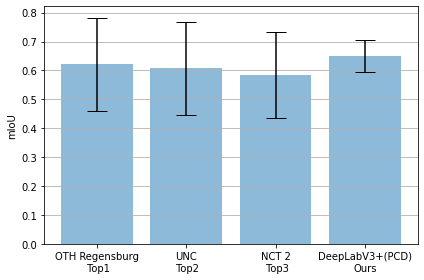

In [ ]:

#np.mean([0.691, 0.575, 0.829, 0.390])
#

import numpy as np
import matplotlib.pyplot as plt

OTH = [0.691, 0.575, 0.829, 0.390]
UNC = [0.663, 0.578, 0.814, 0.373]
NCT = [0.658, 0.555, 0.765, 0.362]
OURS = [0.5681, 0.6895, 0.7108, 0.6332]
#OURS = [0.7011,	0.3467,	0.4502,	0.3445]

OTH_mean = np.mean(OTH)
UNC_mean = np.mean(UNC)
NCT_mean = np.mean(NCT)
OURS_mean = np.mean(OURS)

OTH_std = np.std(OTH)
UNC_std = np.std(UNC)
NCT_std = np.std(NCT)
OURS_std = np.std(OURS)

materials = ['OTH Regensburg\n Top1', 'UNC\n Top2', 'NCT 2\n Top3', 'DeepLabV3+(PCD)\nOurs']
x_pos = np.arange(len(materials))
CTEs = [OTH_mean, UNC_mean, NCT_mean, OURS_mean]
error = [OTH_std, UNC_std, NCT_std, OURS_std]

fig, ax = plt.subplots()
ax.bar(x_pos, CTEs, yerr=error, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_ylabel('mIoU')
ax.set_xticks(x_pos)
ax.set_xticklabels(materials)
ax.yaxis.grid(True)

# Save the figure and show
plt.tight_layout()
plt.savefig('compare_challenge.pdf', bbox_inches='tight', dpi=600)
plt.show()


Ablation Study of Beta/Gamma tuning

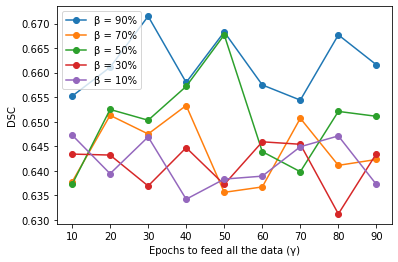

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

beta_90 = [0.6616,	0.6677,	0.6544,	0.6575,	0.6683,	0.658,	0.6715,	0.6611,	0.6552]
beta_80 = [0.6475,	0.6503,	0.6377,	0.6404,	0.6456,	0.6414,	0.6418,	0.6575,	0.6504]
beta_70 = [0.6423,	0.6411,	0.6507,	0.6367,	0.6356,	0.6533,	0.6475,	0.6513,	0.6377]
beta_60 = [0.6449,	0.6487,	0.6403,	0.6374,	0.6333,	0.6532,	0.6369,	0.6344,	0.6405]
beta_50 = [0.6511,	0.6521,	0.6398,	0.6439,	0.6677,	0.6572,	0.6503,	0.6525,	0.6372]
beta_40 = [0.6479,	0.6479,	0.6479,	0.6479,	0.6479,	0.6479,	0.6479,	0.6479,	0.6479]
beta_30 = [0.6435,	0.6312,	0.6454,	0.6459,	0.6372,	0.6447,	0.6369,	0.6432,	0.6434]
beta_20 = [0.6224,	0.6430,	0.6557,	0.6467,	0.6312,	0.6382,	0.6415,	0.6220,	0.6378]
beta_10 = [0.6372,	0.6471,	0.6449,	0.6389,	0.6383,	0.6342,	0.6469,	0.6394,	0.6473]
beta = [beta_90, beta_80, beta_70, beta_60, beta_50, beta_40, beta_30, beta_20, beta_10]
gamma = [90, 80, 70, 60, 50, 40, 30, 20, 10]

#β, γ
beta1 = [beta_90, beta_70, beta_50, beta_30, beta_10]
legends = ['β = 90%', 'β = 70%','β = 50%','β = 30%','β = 10%']
gamma1 = [90, 80, 70, 60, 50, 40, 30, 20, 10]
ax = plt.gca()
lineObjects = ax.plot(gamma1, np.array(beta1).transpose(1,0), marker='o')
ax.legend(lineObjects, legends)
#ax.xaxis.grid(True)
ax.set_ylabel('DSC')
ax.set_xlabel("Epochs to feed all the data (γ)")
#ax.set_ylim([0.0, 0.95])
plt.savefig("gamma_vs_beta.pdf", bbox_inches='tight', dpi=600)


iid vs SD vs PCD (with prediction uncertainty) vs PCD (prediction + boundary Uncertainty)

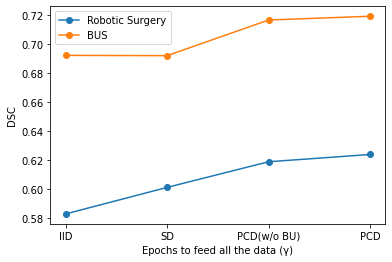

In [ ]:
#UNet
iid_b = 0.6921 
sd_b = 0.6919
pcd_pu_b = 0.7165
pcd_pu_bu_b = 0.7191

iid_r = 0.5827
sd_r = 0.6010
pcd_pu_r = 0.6187
pcd_pu_bu_r = 0.6237
bus = np.array([iid_b, sd_b, pcd_pu_b, pcd_pu_bu_b])
robo = np.array([iid_r, sd_r, pcd_pu_r, pcd_pu_bu_r])
plot_x = [robo, bus]
x_axis_lab = ['IID', 'SD', 'PCD(w/o BU)', 'PCD']
legends= ['Robotic Surgery', 'BUS']

ax = plt.gca()
lineObjects = ax.plot(x_axis_lab, np.array(plot_x).transpose(1,0), marker='o')
ax.legend(lineObjects, legends)
#ax.xaxis.grid(True)
ax.set_ylabel('DSC')
ax.set_xlabel("Epochs to feed all the data (γ)")
#ax.set_ylim([0.0, 0.95])
plt.savefig("iid_vs_pcd.pdf", bbox_inches='tight', dpi=600)	

Robustness

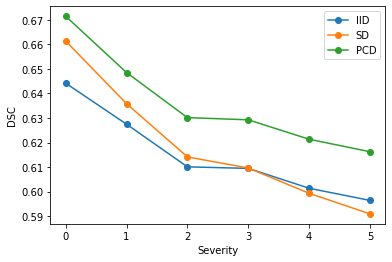

In [ ]:
severity = [0,	1,	2,	3,	4,	5]
iid = [0.6442,	0.627473,	0.61008,	0.609447,	0.601347,	0.596387]
sd = [0.6614,	0.63584,	0.614127,	0.6096,	0.599287,	0.59088]
pcd = [0.6715,	0.648547,	0.630153,	0.62926,	0.621333,	0.61624]
plot_x = [iid, sd, pcd]
legends = ['IID', 'SD', 'PCD']

ax = plt.gca()
lineObjects = ax.plot(severity, np.array(plot_x).transpose(1,0), marker='o')
ax.legend(lineObjects, legends)
#ax.xaxis.grid(True)
ax.set_ylabel('DSC')
ax.set_xlabel("Severity")
#ax.set_ylim([0.0, 0.95])
plt.savefig("robustness_test.pdf", bbox_inches='tight', dpi=600)	

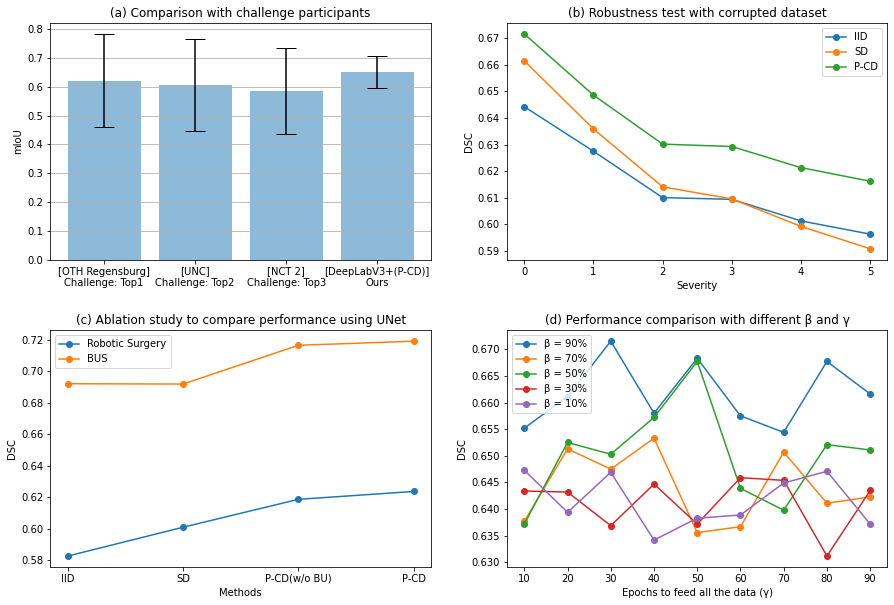

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 2, figsize=(15, 10), gridspec_kw=dict(wspace=0.2, hspace=0.3))


#np.mean([0.691, 0.575, 0.829, 0.390])
#

import numpy as np
import matplotlib.pyplot as plt

OTH = [0.691, 0.575, 0.829, 0.390]
UNC = [0.663, 0.578, 0.814, 0.373]
NCT = [0.658, 0.555, 0.765, 0.362]
OURS = [0.5681, 0.6895, 0.7108, 0.6332]#[0.7011,	0.3467,	0.4502,	0.3445,	0.2559,	0.8907,	0.9042,	0.9057,	0.9639,	0.5431,	0.8474]
#OURS = [0.7011,	0.3467,	0.4502,	0.3445]

OTH_mean = np.mean(OTH)
UNC_mean = np.mean(UNC)
NCT_mean = np.mean(NCT)
OURS_mean = np.mean(OURS)

OTH_std = np.std(OTH)
UNC_std = np.std(UNC)
NCT_std = np.std(NCT)
OURS_std = np.std(OURS)

materials = ['[OTH Regensburg]\nChallenge: Top1', '[UNC]\nChallenge: Top2', '[NCT 2]\nChallenge: Top3', '[DeepLabV3+(P-CD)]\nOurs']
x_pos = np.arange(len(materials))
CTEs = [OTH_mean, UNC_mean, NCT_mean, OURS_mean]
error = [OTH_std, UNC_std, NCT_std, OURS_std]

#fig, ax = plt.subplots()
ax[0,0].bar(x_pos, CTEs, yerr=error, align='center', alpha=0.5, ecolor='black', capsize=10)
ax[0,0].set_ylabel('mIoU')
ax[0,0].set_xticks(x_pos)
ax[0,0].set_xticklabels(materials)
ax[0,0].yaxis.grid(True)
ax[0,0].set_title('(a) Comparison with challenge participants')


severity = [0,	1,	2,	3,	4,	5]
iid = [0.6442,	0.627473,	0.61008,	0.609447,	0.601347,	0.596387]
sd = [0.6614,	0.63584,	0.614127,	0.6096,	0.599287,	0.59088]
pcd = [0.6715,	0.648547,	0.630153,	0.62926,	0.621333,	0.61624]
plot_x = [iid, sd, pcd]
legends = ['IID', 'SD', 'P-CD']

#ax[0,1] = plt.gca()
lineObjects = ax[0,1].plot(severity, np.array(plot_x).transpose(1,0), marker='o')
ax[0,1].legend(lineObjects, legends)
#ax.xaxis.grid(True)
ax[0,1].set_ylabel('DSC')
ax[0,1].set_xlabel("Severity")
ax[0,1].set_title('(b) Robustness test with corrupted dataset')



#UNet
iid_b = 0.6921 
sd_b = 0.6919
pcd_pu_b = 0.7165
pcd_pu_bu_b = 0.7191

iid_r = 0.5827
sd_r = 0.6010
pcd_pu_r = 0.6187
pcd_pu_bu_r = 0.6237
bus = np.array([iid_b, sd_b, pcd_pu_b, pcd_pu_bu_b])
robo = np.array([iid_r, sd_r, pcd_pu_r, pcd_pu_bu_r])
plot_x = [robo, bus]
x_axis_lab = ['IID', 'SD', 'P-CD(w/o BU)', 'P-CD']
legends= ['Robotic Surgery', 'BUS']

#ax = plt.gca()
lineObjects = ax[1,0].plot(x_axis_lab, np.array(plot_x).transpose(1,0), marker='o')
ax[1,0].legend(lineObjects, legends)
#ax.xaxis.grid(True)
ax[1,0].set_ylabel('DSC')
ax[1,0].set_xlabel("Methods")
ax[1,0].set_title('(c) Ablation study to compare performance using UNet')


beta_90 = [0.6616,	0.6677,	0.6544,	0.6575,	0.6683,	0.658,	0.6715,	0.6611,	0.6552]
beta_80 = [0.6475,	0.6503,	0.6377,	0.6404,	0.6456,	0.6414,	0.6418,	0.6575,	0.6504]
beta_70 = [0.6423,	0.6411,	0.6507,	0.6367,	0.6356,	0.6533,	0.6475,	0.6513,	0.6377]
beta_60 = [0.6449,	0.6487,	0.6403,	0.6374,	0.6333,	0.6532,	0.6369,	0.6344,	0.6405]
beta_50 = [0.6511,	0.6521,	0.6398,	0.6439,	0.6677,	0.6572,	0.6503,	0.6525,	0.6372]
beta_40 = [0.6479,	0.6479,	0.6479,	0.6479,	0.6479,	0.6479,	0.6479,	0.6479,	0.6479]
beta_30 = [0.6435,	0.6312,	0.6454,	0.6459,	0.6372,	0.6447,	0.6369,	0.6432,	0.6434]
beta_20 = [0.6224,	0.6430,	0.6557,	0.6467,	0.6312,	0.6382,	0.6415,	0.6220,	0.6378]
beta_10 = [0.6372,	0.6471,	0.6449,	0.6389,	0.6383,	0.6342,	0.6469,	0.6394,	0.6473]
beta = [beta_90, beta_80, beta_70, beta_60, beta_50, beta_40, beta_30, beta_20, beta_10]
gamma = [90, 80, 70, 60, 50, 40, 30, 20, 10]

#β, γ
beta1 = [beta_90, beta_70, beta_50, beta_30, beta_10]
legends = ['β = 90%', 'β = 70%','β = 50%','β = 30%','β = 10%']
gamma1 = [90, 80, 70, 60, 50, 40, 30, 20, 10]
#ax = plt.gca()
lineObjects = ax[1,1].plot(gamma1, np.array(beta1).transpose(1,0), marker='o')
ax[1,1].legend(lineObjects, legends)
#ax.xaxis.grid(True)
ax[1,1].set_ylabel('DSC')
ax[1,1].set_xlabel("Epochs to feed all the data (γ)")
ax[1,1].set_title('(d) Performance comparison with different β and γ')

plt.savefig("robustness_ablation_all.pdf", bbox_inches='tight', dpi=1500)	

# After Rebuttal

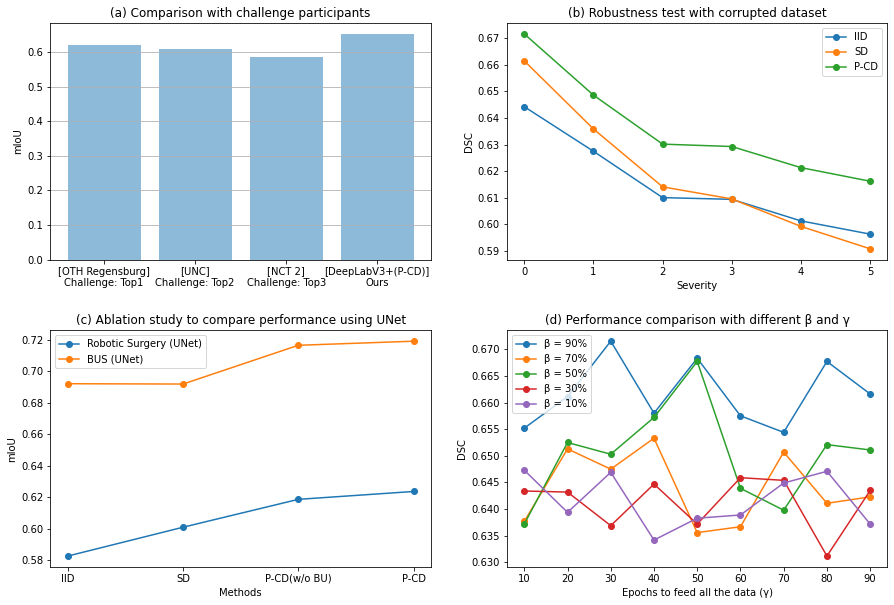

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 2, figsize=(15, 10), gridspec_kw=dict(wspace=0.2, hspace=0.3))


#np.mean([0.691, 0.575, 0.829, 0.390])
#

import numpy as np
import matplotlib.pyplot as plt

OTH = [0.691, 0.575, 0.829, 0.390]
UNC = [0.663, 0.578, 0.814, 0.373]
NCT = [0.658, 0.555, 0.765, 0.362]
OURS = [0.5681, 0.6895, 0.7108, 0.6332]#[0.7011,	0.3467,	0.4502,	0.3445,	0.2559,	0.8907,	0.9042,	0.9057,	0.9639,	0.5431,	0.8474]
#OURS = [0.7011,	0.3467,	0.4502,	0.3445]

OTH_mean = np.mean(OTH)
UNC_mean = np.mean(UNC)
NCT_mean = np.mean(NCT)
OURS_mean = np.mean(OURS)

OTH_std = np.std(OTH)
UNC_std = np.std(UNC)
NCT_std = np.std(NCT)
OURS_std = np.std(OURS)

materials = ['[OTH Regensburg]\nChallenge: Top1', '[UNC]\nChallenge: Top2', '[NCT 2]\nChallenge: Top3', '[DeepLabV3+(P-CD)]\nOurs']
x_pos = np.arange(len(materials))
CTEs = [OTH_mean, UNC_mean, NCT_mean, OURS_mean]
# error = [OTH_std, UNC_std, NCT_std, OURS_std]

#fig, ax = plt.subplots()
ax[0,0].bar(x_pos, CTEs, align='center', alpha=0.5, ecolor='black', capsize=10)
ax[0,0].set_ylabel('mIoU')
ax[0,0].set_xticks(x_pos)
ax[0,0].set_xticklabels(materials)
ax[0,0].yaxis.grid(True)
ax[0,0].set_title('(a) Comparison with challenge participants')


severity = [0,	1,	2,	3,	4,	5]
iid = [0.6442,	0.627473,	0.61008,	0.609447,	0.601347,	0.596387]
sd = [0.6614,	0.63584,	0.614127,	0.6096,	0.599287,	0.59088]
pcd = [0.6715,	0.648547,	0.630153,	0.62926,	0.621333,	0.61624]
plot_x = [iid, sd, pcd]
legends = ['IID', 'SD', 'P-CD']

#ax[0,1] = plt.gca()
lineObjects = ax[0,1].plot(severity, np.array(plot_x).transpose(1,0), marker='o')
ax[0,1].legend(lineObjects, legends)
#ax.xaxis.grid(True)
ax[0,1].set_ylabel('DSC')
ax[0,1].set_xlabel("Severity")
ax[0,1].set_title('(b) Robustness test with corrupted dataset')



#UNet (BUS)
iid_b = 0.6921 
sd_b = 0.6919
pcd_pu_b = 0.7165
pcd_pu_bu_b = 0.7191

#UNet (Robotic)
iid_r = 0.5827
sd_r = 0.6010
pcd_pu_r = 0.6187
pcd_pu_bu_r = 0.6237
bus = np.array([iid_b, sd_b, pcd_pu_b, pcd_pu_bu_b])
robo = np.array([iid_r, sd_r, pcd_pu_r, pcd_pu_bu_r])
plot_x = [robo, bus]
x_axis_lab = ['IID', 'SD', 'P-CD(w/o BU)', 'P-CD']
legends= ['Robotic Surgery (UNet)', 'BUS (UNet)']

#ax = plt.gca()
lineObjects = ax[1,0].plot(x_axis_lab, np.array(plot_x).transpose(1,0), marker='o')
ax[1,0].legend(lineObjects, legends)
#ax.xaxis.grid(True)
ax[1,0].set_ylabel('mIoU')
ax[1,0].set_xlabel("Methods")
ax[1,0].set_title('(c) Ablation study to compare performance using UNet')


beta_90 = [0.6616,	0.6677,	0.6544,	0.6575,	0.6683,	0.658,	0.6715,	0.6611,	0.6552]
beta_80 = [0.6475,	0.6503,	0.6377,	0.6404,	0.6456,	0.6414,	0.6418,	0.6575,	0.6504]
beta_70 = [0.6423,	0.6411,	0.6507,	0.6367,	0.6356,	0.6533,	0.6475,	0.6513,	0.6377]
beta_60 = [0.6449,	0.6487,	0.6403,	0.6374,	0.6333,	0.6532,	0.6369,	0.6344,	0.6405]
beta_50 = [0.6511,	0.6521,	0.6398,	0.6439,	0.6677,	0.6572,	0.6503,	0.6525,	0.6372]
beta_40 = [0.6479,	0.6479,	0.6479,	0.6479,	0.6479,	0.6479,	0.6479,	0.6479,	0.6479]
beta_30 = [0.6435,	0.6312,	0.6454,	0.6459,	0.6372,	0.6447,	0.6369,	0.6432,	0.6434]
beta_20 = [0.6224,	0.6430,	0.6557,	0.6467,	0.6312,	0.6382,	0.6415,	0.6220,	0.6378]
beta_10 = [0.6372,	0.6471,	0.6449,	0.6389,	0.6383,	0.6342,	0.6469,	0.6394,	0.6473]
beta = [beta_90, beta_80, beta_70, beta_60, beta_50, beta_40, beta_30, beta_20, beta_10]
gamma = [90, 80, 70, 60, 50, 40, 30, 20, 10]

#β, γ
beta1 = [beta_90, beta_70, beta_50, beta_30, beta_10]
legends = ['β = 90%', 'β = 70%','β = 50%','β = 30%','β = 10%']
gamma1 = [90, 80, 70, 60, 50, 40, 30, 20, 10]
#ax = plt.gca()
lineObjects = ax[1,1].plot(gamma1, np.array(beta1).transpose(1,0), marker='o')
ax[1,1].legend(lineObjects, legends)
#ax.xaxis.grid(True)
ax[1,1].set_ylabel('DSC')
ax[1,1].set_xlabel("Epochs to feed all the data (γ)")
ax[1,1].set_title('(d) Performance comparison with different β and γ')

plt.savefig("robustness_ablation_all.pdf", bbox_inches='tight', dpi=1500)	

#Splitting Figures


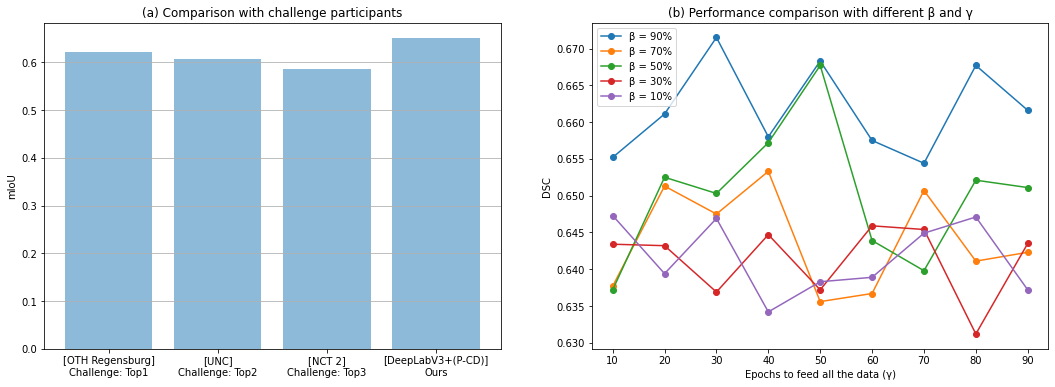

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(18, 6), gridspec_kw=dict(wspace=0.2, hspace=0.3))


#np.mean([0.691, 0.575, 0.829, 0.390])
#

import numpy as np
import matplotlib.pyplot as plt

OTH = [0.691, 0.575, 0.829, 0.390]
UNC = [0.663, 0.578, 0.814, 0.373]
NCT = [0.658, 0.555, 0.765, 0.362]
OURS = [0.5681, 0.6895, 0.7108, 0.6332]#[0.7011,	0.3467,	0.4502,	0.3445,	0.2559,	0.8907,	0.9042,	0.9057,	0.9639,	0.5431,	0.8474]
#OURS = [0.7011,	0.3467,	0.4502,	0.3445]

OTH_mean = np.mean(OTH)
UNC_mean = np.mean(UNC)
NCT_mean = np.mean(NCT)
OURS_mean = np.mean(OURS)

OTH_std = np.std(OTH)
UNC_std = np.std(UNC)
NCT_std = np.std(NCT)
OURS_std = np.std(OURS)

materials = ['[OTH Regensburg]\nChallenge: Top1', '[UNC]\nChallenge: Top2', '[NCT 2]\nChallenge: Top3', '[DeepLabV3+(P-CD)]\nOurs']
x_pos = np.arange(len(materials))
CTEs = [OTH_mean, UNC_mean, NCT_mean, OURS_mean]
# error = [OTH_std, UNC_std, NCT_std, OURS_std]

#fig, ax = plt.subplots()
ax[0].bar(x_pos, CTEs, align='center', alpha=0.5, ecolor='black', capsize=10)
ax[0].set_ylabel('mIoU')
ax[0].set_xticks(x_pos)
ax[0].set_xticklabels(materials)
ax[0].yaxis.grid(True)
ax[0].set_title('(a) Comparison with challenge participants')


beta_90 = [0.6616,	0.6677,	0.6544,	0.6575,	0.6683,	0.658,	0.6715,	0.6611,	0.6552]
beta_80 = [0.6475,	0.6503,	0.6377,	0.6404,	0.6456,	0.6414,	0.6418,	0.6575,	0.6504]
beta_70 = [0.6423,	0.6411,	0.6507,	0.6367,	0.6356,	0.6533,	0.6475,	0.6513,	0.6377]
beta_60 = [0.6449,	0.6487,	0.6403,	0.6374,	0.6333,	0.6532,	0.6369,	0.6344,	0.6405]
beta_50 = [0.6511,	0.6521,	0.6398,	0.6439,	0.6677,	0.6572,	0.6503,	0.6525,	0.6372]
beta_40 = [0.6479,	0.6479,	0.6479,	0.6479,	0.6479,	0.6479,	0.6479,	0.6479,	0.6479]
beta_30 = [0.6435,	0.6312,	0.6454,	0.6459,	0.6372,	0.6447,	0.6369,	0.6432,	0.6434]
beta_20 = [0.6224,	0.6430,	0.6557,	0.6467,	0.6312,	0.6382,	0.6415,	0.6220,	0.6378]
beta_10 = [0.6372,	0.6471,	0.6449,	0.6389,	0.6383,	0.6342,	0.6469,	0.6394,	0.6473]
beta = [beta_90, beta_80, beta_70, beta_60, beta_50, beta_40, beta_30, beta_20, beta_10]
gamma = [90, 80, 70, 60, 50, 40, 30, 20, 10]

#β, γ
beta1 = [beta_90, beta_70, beta_50, beta_30, beta_10]
legends = ['β = 90%', 'β = 70%','β = 50%','β = 30%','β = 10%']
gamma1 = [90, 80, 70, 60, 50, 40, 30, 20, 10]
#ax = plt.gca()
lineObjects = ax[1].plot(gamma1, np.array(beta1).transpose(1,0), marker='o')
ax[1].legend(lineObjects, legends)
#ax.xaxis.grid(True)
ax[1].set_ylabel('DSC')
ax[1].set_xlabel("Epochs to feed all the data (γ)")
ax[1].set_title('(b) Performance comparison with different β and γ')

plt.savefig("ablation_compare_challenge.pdf", bbox_inches='tight', dpi=1500)	

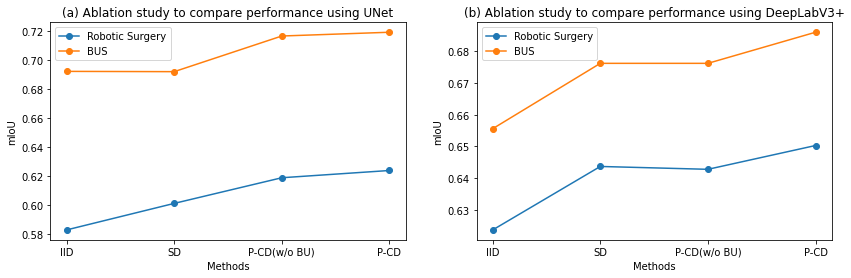

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(14, 4), gridspec_kw=dict(wspace=0.2, hspace=0.3))
#UNet
bus = np.array([0.6921, 0.6919, 0.7165, 0.7191]) #np.array([iid_b, sd_b, pcd_pu_b, pcd_pu_bu_b])
robo = np.array([0.5827, 0.6010, 0.6187, 0.6237]) #np.array([iid_r, sd_r, pcd_pu_r, pcd_pu_bu_r])
plot_x = [robo, bus]
x_axis_lab = ['IID', 'SD', 'P-CD(w/o BU)', 'P-CD']
legends= ['Robotic Surgery', 'BUS']

#ax = plt.gca()
lineObjects = ax[0].plot(x_axis_lab, np.array(plot_x).transpose(1,0), marker='o')
ax[0].legend(lineObjects, legends)
#ax.xaxis.grid(True)
ax[0].set_ylabel('mIoU')
ax[0].set_xlabel("Methods")
ax[0].set_title('(a) Ablation study to compare performance using UNet')



#DeepLabV3+
bus = np.array([0.6556, 0.6762, 0.6762,  0.6860]) #0.6762 is not correct for w/o BU
robo = np.array([0.6237, 0.6437, 0.6428, 0.6503])
plot_x = [robo, bus]

lineObjects = ax[1].plot(x_axis_lab, np.array(plot_x).transpose(1,0), marker='o')
ax[1].legend(lineObjects, legends)
#ax.xaxis.grid(True)
ax[1].set_ylabel('mIoU')
ax[1].set_xlabel("Methods")
ax[1].set_title('(b) Ablation study to compare performance using DeepLabV3+');
plt.savefig("ablation_compare_unet_deeplab.pdf", bbox_inches='tight', dpi=1500)	